In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

In [6]:
import sklearn

In [7]:
sklearn.__version__

'1.0.2'

In [11]:
X,y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.951048951048951

[Text(0.625, 0.9375, 'X[7] <= 0.051\ngini = 0.467\nsamples = 426\nvalue = [158, 268]'),
 Text(0.4318181818181818, 0.8125, 'X[20] <= 16.83\ngini = 0.113\nsamples = 267\nvalue = [16, 251]'),
 Text(0.3181818181818182, 0.6875, 'X[13] <= 48.7\ngini = 0.039\nsamples = 249\nvalue = [5, 244]'),
 Text(0.22727272727272727, 0.5625, 'X[24] <= 0.178\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(0.18181818181818182, 0.4375, 'X[14] <= 0.003\ngini = 0.016\nsamples = 245\nvalue = [2, 243]'),
 Text(0.09090909090909091, 0.3125, 'X[21] <= 26.89\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.045454545454545456, 0.1875, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.13636363636363635, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2727272727272727, 0.3125, 'X[21] <= 33.35\ngini = 0.008\nsamples = 239\nvalue = [1, 238]'),
 Text(0.22727272727272727, 0.1875, 'gini = 0.0\nsamples = 225\nvalue = [0, 225]'),
 Text(0.3181818181818182, 0.1875, 'X[21] <= 33.56\ngini = 0.133\nsample

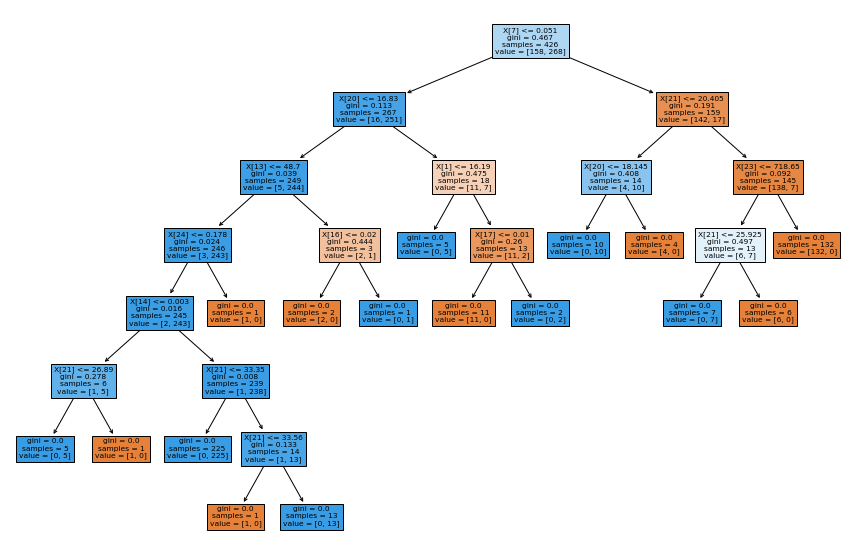

In [13]:
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(clf,filled = True)

In [14]:
# Hyper Para tunnug, to reduce overfitting

In [31]:
path = clf.cost_complexity_pruning_path(X_train,y_train)

In [32]:
path

{'ccp_alphas': array([0.        , 0.00232826, 0.00312989, 0.00459972, 0.00596017,
        0.00794511, 0.01213836, 0.01341382, 0.01516793, 0.01610939,
        0.02658769, 0.02752968, 0.32476748]),
 'impurities': array([0.        , 0.00931302, 0.01244291, 0.01704264, 0.02300281,
        0.03094792, 0.04308627, 0.05650009, 0.07166802, 0.08777741,
        0.1143651 , 0.14189478, 0.46666226])}

In [33]:
ccp_alphas, impurities = path.ccp_alphas,path.impurities

In [34]:
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=42,ccp_alpha=ccp_alpha)
  clf.fit(X_train,y_train)
  clfs.append(clf)
print(f"Number of Nodes in the last tree is: {clfs[-1].tree_.node_count} with ccp_alpha : {ccp_alphas[-1]} ")

Number of Nodes in the last tree is: 1 with ccp_alpha : 0.3247674769665928 


In [35]:
ccp_alphas # it helps us to find out all weak points with respect to the leaf node from the D.T

array([0.        , 0.00232826, 0.00312989, 0.00459972, 0.00596017,
       0.00794511, 0.01213836, 0.01341382, 0.01516793, 0.01610939,
       0.02658769, 0.02752968, 0.32476748])

In [36]:
train_score = [clf.score(X_train,y_train) for clf in clfs]
test_score = [clf.score(X_test,y_test) for clf in clfs]

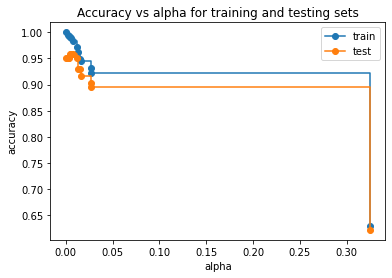

In [42]:
fig,ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas,train_score, marker='o',label = 'train',drawstyle = 'steps-post')
ax.plot(ccp_alphas,test_score,marker='o',label = 'test',drawstyle = 'steps-post')
ax.legend()
plt.show()

In [64]:
clf1 = DecisionTreeClassifier(random_state= 42,ccp_alpha=0.02)
clf1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.02, random_state=42)

In [65]:
y_pred = clf1.predict(X_test)
accuracy_score(y_test,y_pred)

0.916083916083916

[Text(0.5, 0.8333333333333334, 'X[7] <= 0.051\ngini = 0.467\nsamples = 426\nvalue = [158, 268]'),
 Text(0.25, 0.5, 'X[20] <= 16.83\ngini = 0.113\nsamples = 267\nvalue = [16, 251]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.039\nsamples = 249\nvalue = [5, 244]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.475\nsamples = 18\nvalue = [11, 7]'),
 Text(0.75, 0.5, 'X[21] <= 20.405\ngini = 0.191\nsamples = 159\nvalue = [142, 17]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.408\nsamples = 14\nvalue = [4, 10]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.092\nsamples = 145\nvalue = [138, 7]')]

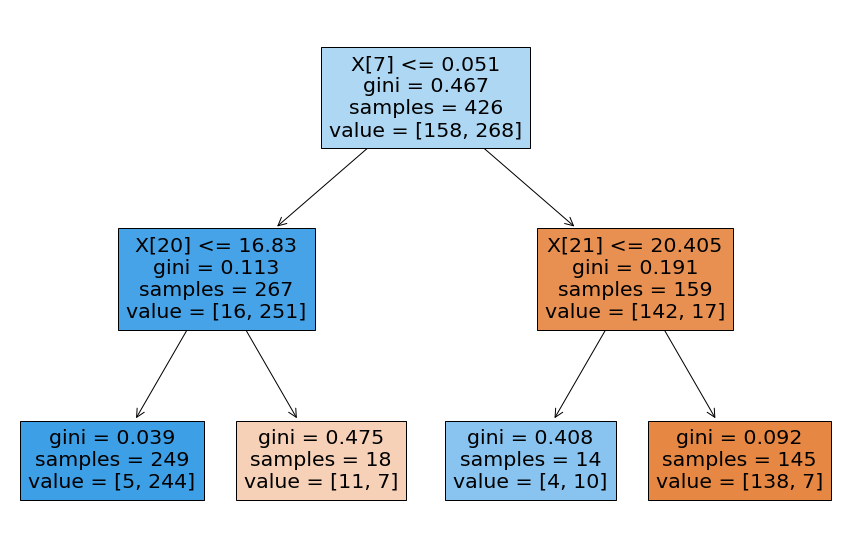

In [66]:
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(clf1,filled = True)
